<a href="https://colab.research.google.com/github/GitWahome/Modern-Computational-Statistics/blob/master/Assignment_4,CS146.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports

In [0]:
import pandas as pd
from scipy.stats import beta
from scipy.stats import binom
import matplotlib.pyplot as plt
import numpy as np

Control data loading

In [3]:
data_control = pd.DataFrame({"groups":["Di Rienzo 2014","Galli 1994","Kaufman 1974","Qin 2014","Sanchez 2012", "Silny 2006", "Totals"],
                "probability of success":[0.6,0.61,0.4,0.54,0.41,0,0.47]
               })
data_control

,groups,probability of success
0,Di Rienzo 2014,0.60
1,Galli 1994,0.61
2,Kaufman 1974,0.40
3,Qin 2014,0.54
4,Sanchez 2012,0.41
5,Silny 2006,0.00
6,Totals,0.47


The test statistics we will evaluate for the data are the mean and standard deviation.

In [4]:
def significant_stats(data):
  mean, standardv = np.mean(data), np.std(data)
  print("The mean of the data provided is {} \nThe standard deviation is {}"
        .format(mean,standardv))
  return mean, standardv
data_mean, data_std = significant_stats(data = data_control["probability of success"][:-1])

The mean of the data provided is 0.4266666666666667 
The standard deviation is 0.20797969986408663


From the notebook, we have the posterior distribution for the control group provided as Beta(theta_c|58, 65)

I will use scipy.stats.beta to generate samples from this distribution.

---



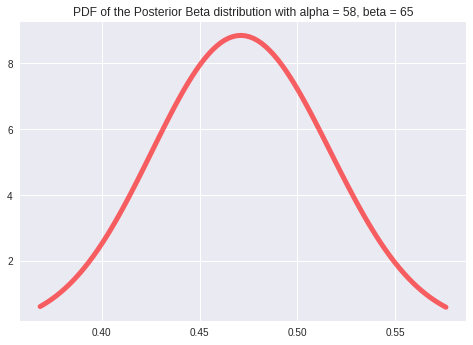

In [5]:
fig, ax = plt.subplots(1, 1)
plt.title("PDF of the Posterior Beta distribution with alpha = 58, beta = 65")
a, b = 58, 65
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)
ax.plot(x, beta.pdf(x, a, b),'r-', lw=5, alpha=0.6, label='beta pdf')

I will generate 1000 random samples from the beta posterior and then evaluating the standard deviation of the generated samples. I generate samples of the same size as the data, 6. If the beta posterior is a good fit for our data, we expect that the difference between the generated sample standard deviation and our actual standard deviation would be centered around 0. If not, then there would be a discrepancy in our model. 



---



In [0]:
#The test statistic I used to evaluate if the model was suitable was the skew of the standard deviation from the data standard dev
def test_statistic(data_std = data_std):
  #Generate 1000 posterior samples and find their standard deviations
  posterior_sample_stds = [np.std(beta.rvs(a, b, size=6)) for i in range(1000)]
  #Find the difference between these samples and the data standard deviation
  return posterior_sample_stds - data_std
difference_std = test_statistic()

Now to print a histogram showing the distribution of the differences

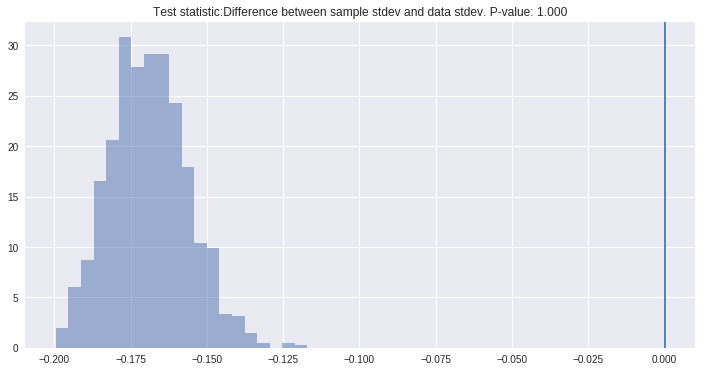

In [7]:
plt.figure(figsize=(12, 6))
plt.hist(difference_std, bins=20, alpha=0.5, density=True)
plt.axvline(0)
plt.title('Test statistic:Difference between sample stdev and data stdev. P-value: %.3f' % (np.mean(np.array(difference_std) < 0)))
plt.show()

Well, Ideally, we would like to have a p value at around 0.5 which would imply that 50% of the data was above 0 and 50% below 0. This is a good situation since it means the model we have has a standard deviation similar to the data standard deviation because they would have little difference. But at 1 or 0, in our case 1, almost all the data generated have standard deviations that are different fom the actual data standard deviation. This is absolutely terrible. Our model essentially is not fit for our data. While they may have similar means, the scatter of the data as predicted by the model is completely different from that of our actual data thus the posterior model is not a good fit for our data.